# ANÁLISIS EXPLORATORIO DE DATOS

## 1. El set de datos

La información se encuentra en el archivo CSV (`Rendimiento de los estudiantes de 5to y 6to grado.csv`) con 1000 filas y 10 columnas.

1. "género": género (categórica: "femenino", "masculino")
2. "raza/etnia": grupo racial o étnico (categórica: "grupo A", "grupo B", "grupo C", "grupo D", "grupo E")
3. "nivel educativo de los padres": nivel educativo de los padres (categórica: "Licenciatura", "Algun estudio universitario", "Título de maestría", "Título de asociado", "Escuela secundaria", "Algun estudio de secundaria")
4. "almuerzo": tipo de almuerzo (categórica: "estándar", "gratis/reducido")
5. "curso de preparación para el examen": si completó un curso de preparación para el examen (categórica: "ninguno", "completado")
6. "puntaje en matemáticas": puntaje en matemáticas (numérica)
7. "puntaje en lectura": puntaje en lectura (numérica)
8. "puntaje en escritura": puntaje en escritura (numérica)
9. "promedio": nota promedio de los estudiantes entre las 3 evalucaciones (numérica)
10. "nota": nota promedio en letras (categórica: "A", "B", "C", "D", "F")

## 2. Lectura del dataset

In [38]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Lectura del data set
df = pd.read_csv('https://raw.githubusercontent.com/Rickfer14/StudentsPerformance-G5-G6-Grupo-5/refs/heads/main/Rendimiento%20de%20los%20estudiantes%20de%205to%20y%206to%20grado.csv')

In [40]:
print(df.shape)
df.head()

(1000, 10)


,Género,Raza,Nivel educativo de los padres,Almuerzo,Preparación,Nota en matemáticas,Nota en lectura,Nota en escritura,Promedio,Nota
0,Femenino,Grupo B,Licenciatura,Estándar,Ninguna,72,72,74,72.67,C
1,Femenino,Grupo C,Algun estudio universitario,Estándar,Completada,69,90,88,82.33,B
2,Femenino,Grupo B,Título de maestría,Estándar,Ninguna,90,95,93,92.67,A
3,Masculino,Grupo A,Título de asociado,Gratis/Reducido,Ninguna,47,57,44,49.33,F
4,Masculino,Grupo C,Algun estudio universitario,Estándar,Ninguna,76,78,75,76.33,C


## 3. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a los objetivos planteados: 
1. Objetivo General
- Analizar la Correlación Entre el Nivel Educativo Parental y la Preparación Previa para Exámenes en Estudiantes de 5to Y 6to Grado.
2. Objetivos Específicos
- Distribuir las categorías de preparación para exámenes (completed/none) entre los diferentes niveles educativos parentales.
- Comparar si los estudiantes con padres de mayor nivel educativo tienen una tasa de preparación para exámenes significativamente mayor que aquellos con padres de menor formación.
- Evaluar el impacto de la preparación previa para exámenes en las notas de los estudiantes, según el nivel educativo parental.
- Analizar si el tipo de almuerzo influye en la preparación para exámenes en estudiantes con padres de menor nivel educativo “some high school”(caso atipico).

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

3.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [41]:
# Con df.info() podemos ver las variables categóricas
# (Dtype=object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Género                         1000 non-null   object 
 1   Raza                           1000 non-null   object 
 2   Nivel educativo de los padres  1000 non-null   object 
 3   Almuerzo                       1000 non-null   object 
 4   Preparación                    1000 non-null   object 
 5   Nota en matemáticas            1000 non-null   int64  
 6   Nota en lectura                1000 non-null   int64  
 7   Nota en escritura              1000 non-null   int64  
 8   Promedio                       1000 non-null   float64
 9   Nota                           1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


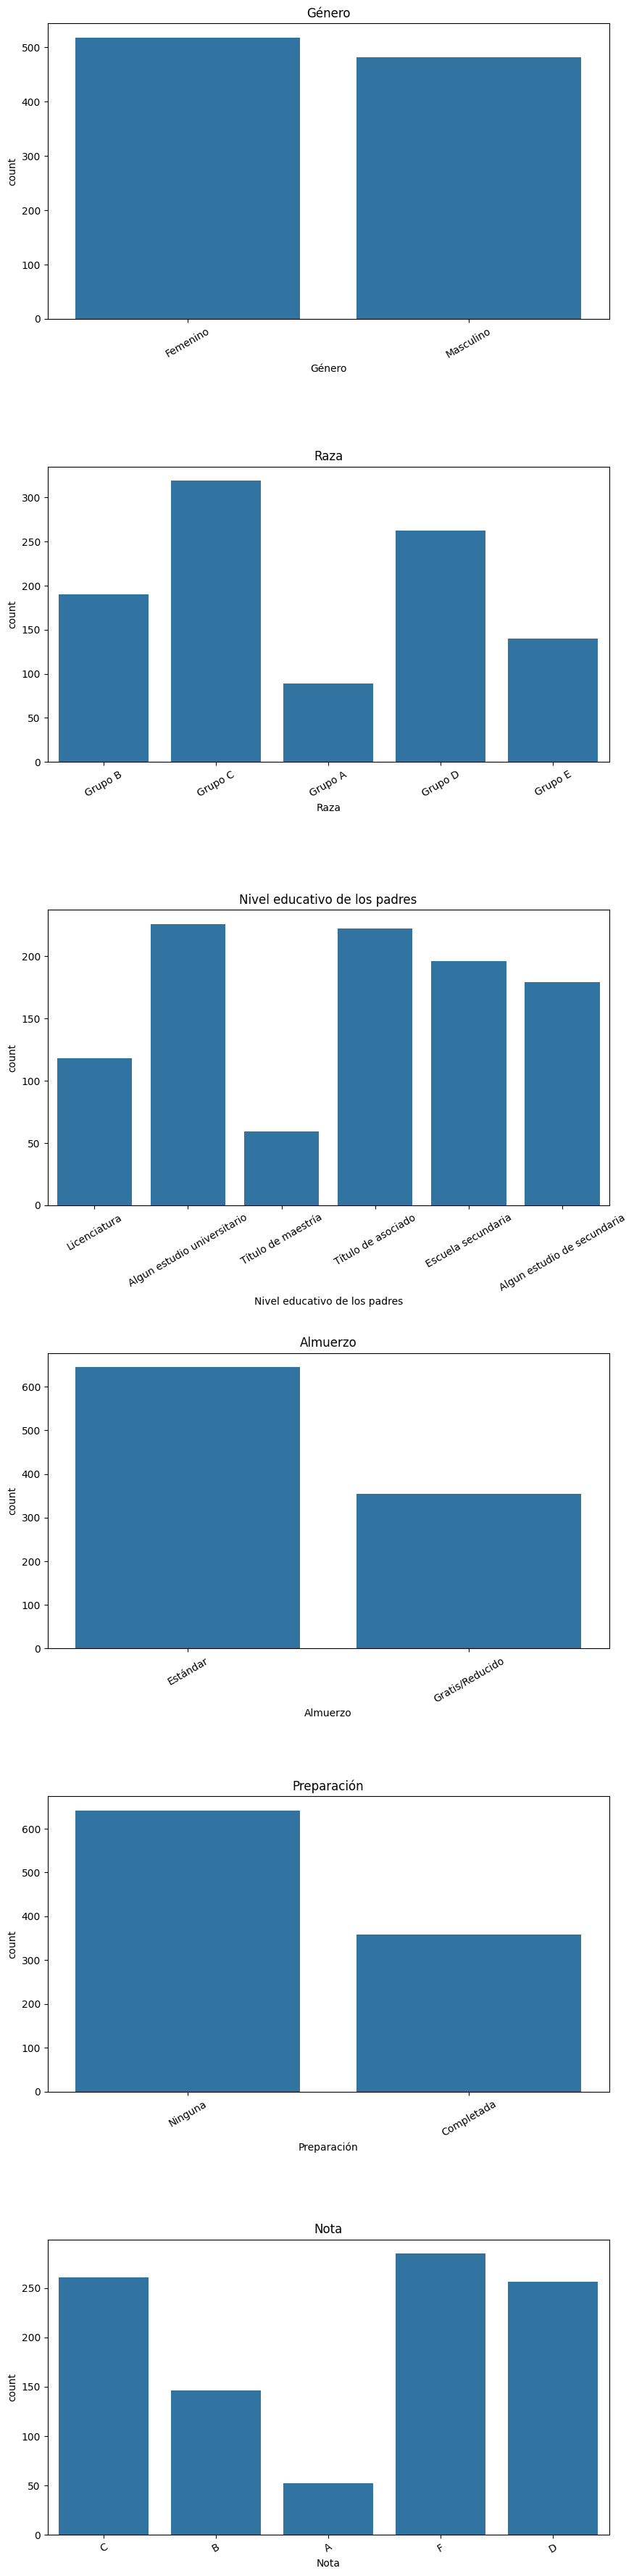

In [42]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['Género', 'Raza', 'Nivel educativo de los padres', 'Almuerzo', 'Preparación',
       'Nota']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticks(ax[i].get_xticks())
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

**Observaciones:**

Niveles de cada variable de interés:
- "género": 2 (femenino, masculino). En este caso el set está relativamente balanceado.
- "nivel educativo de los padres": 6.
- "almuerzo": 2 (estándar, gratis/reducido). En este caso la mayoria se encuentran en "estándar".
- "preparación": 2 (ninguna, completado). En este caso la mayoria se encuentran en "ninguna".
- "nota": 5 (A,B,C,D,F). En este caso la mayoria se encuentran en "C","D" y "F".

In [43]:
# Elimino la columna 'Raza' pues no aportan información al trabajo

df.drop(columns=['Raza'],inplace=True)
df.columns

Index(['Género', 'Nivel educativo de los padres', 'Almuerzo', 'Preparación',
       'Nota en matemáticas', 'Nota en lectura', 'Nota en escritura',
       'Promedio', 'Nota'],
      dtype='object')

Veamos inicialmente el comportamiento de las variables numéricas ('Nota en matemáticas', 'Nota en lectura', 'Nota en escritura' y 'Promedio')

In [44]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
df.describe()

,Nota en matemáticas,Nota en lectura,Nota en escritura,Promedio
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


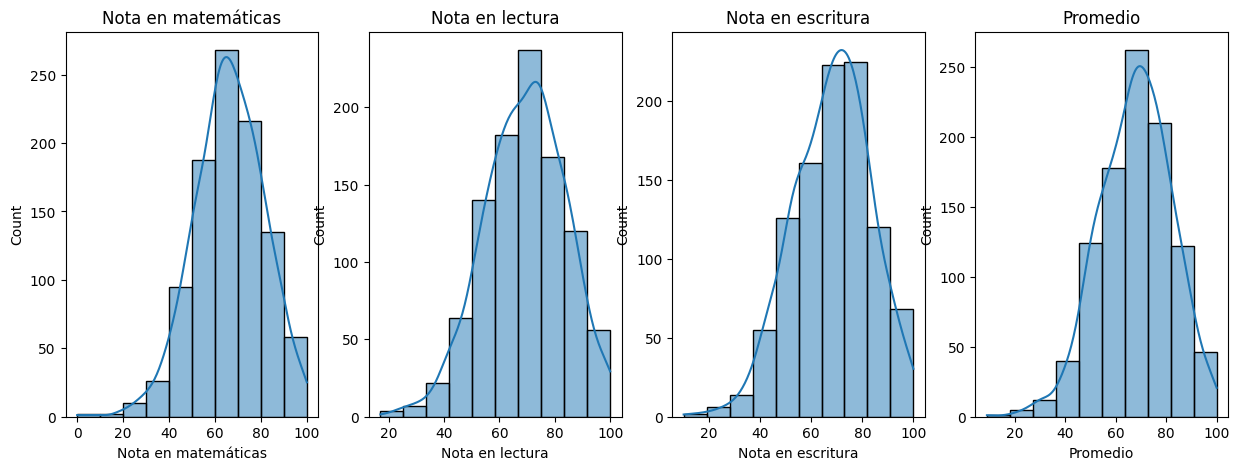

In [45]:
# Graficamos dichas variables para verlas mejor

col_num = ['Nota en matemáticas', 'Nota en lectura', 'Nota en escritura', 'Promedio']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    nbins = 10
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [46]:
# Veamos en detalle lo que ocurre con el promedio
df['Promedio'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: Promedio, dtype: float64

**Observaciones:**

- La mayoria de los estudiantes tiene una nota promedio entre los 60 y los 80 puntos.
- La mayor parte de los estudiantes (75%) tiene una nota promedio inferior a los 78 puntos.
- Una parte importante de los estudiantes (25%) tiene una nota promedio inferior a los 58 puntos que equivaldría a una F o a ser reprovados.

### 3.2 Análisis univariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('Nota en matemáticas', 'Nota en lectura', 'Nota en escritura', 'Promedio', 'Nivel educativo de los padres', 'Almuerzo') y la variable a predecir ('Preparación').

In [47]:
# Comencemos representando la variable a predecir de forma binaria:
# 'Completado' = 1, 'Ninguna' = 0
diccionario = {'Completada':1, 'Ninguna':0}
binario = df['Preparación'].map(diccionario)
df['Preparación_bin'] = binario

# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'Preparación_bin'

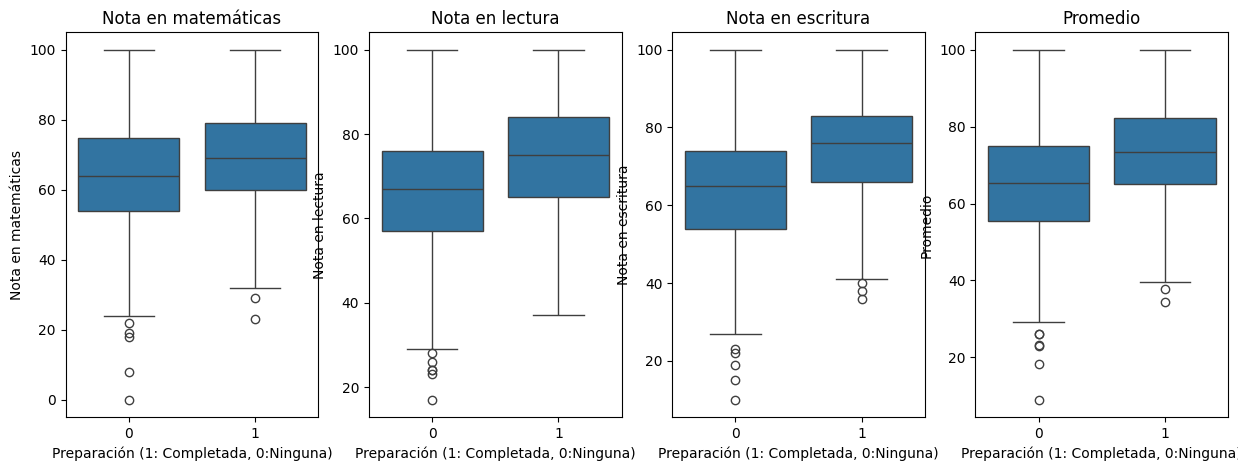

In [48]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('Preparación')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="Preparación_bin", y=col, data=df, ax=ax[i])
  ax[i].set_xlabel('Preparación (1: Completada, 0:Ninguna)')
  ax[i].set_title(col)

**Observaciones:**
- Podemos observar que el rango de estudiantes que completaron la preparación tienen mejores notas que los que no.
- Además la mayor concentración de estudiantes que si completaron la preparación está por encima de los que no la completaron.

In [49]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = df.groupby(x, observed=True)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Genero una gráfica de barras
    
    plt.figure(figsize=(14,6))
    sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
    plt.grid()
   

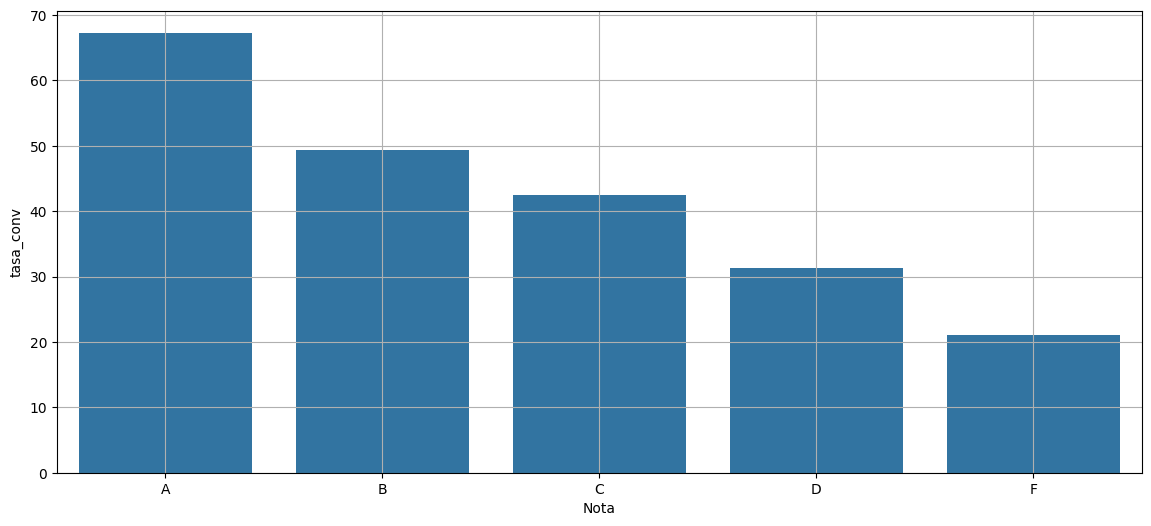

In [50]:
graficar_tasas_conversion('Nota','Preparación_bin')

**Observaciones:**

- Al parecer hay un patrón. Si organizamos las barras de forma descendiente observamos:
    - A ≈ 70%
    - B ≈ 50%
    - C ≈ 40%
    - D ≈ 30%
    - F ≈ 20%
- Observamos que una nota mas alta genera una mayor tasa de conversión.

Ahora realizaremos un análisis similar pero para las variables categóricas:

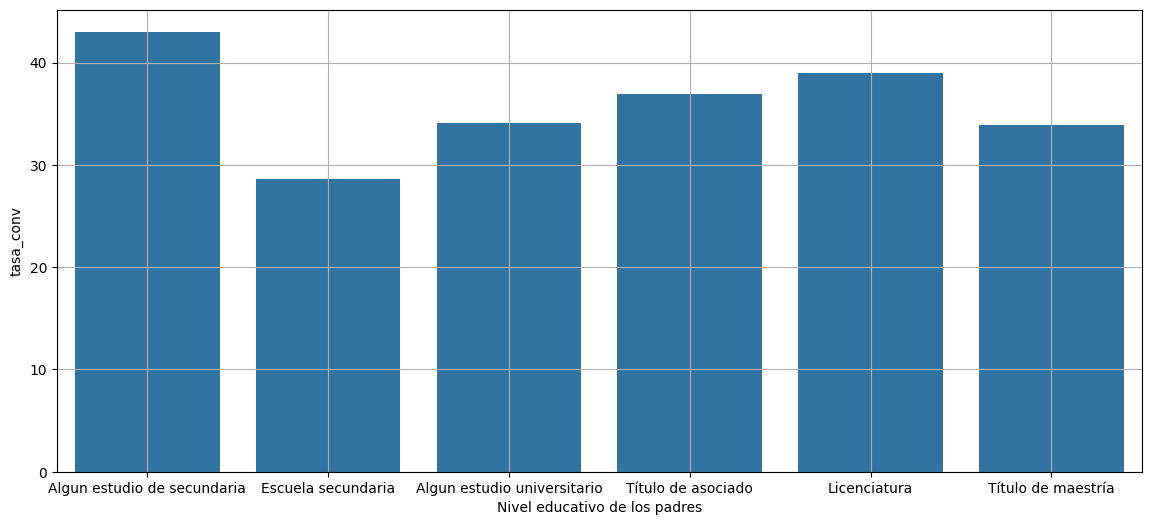

In [51]:
orden_niveles = ['Algun estudio de secundaria', 'Escuela secundaria','Algun estudio universitario', 'Título de asociado', 
                 'Licenciatura', 'Título de maestría']

# Convertir la columna a una categoría ordenada
df['Nivel educativo de los padres'] = pd.Categorical(df['Nivel educativo de los padres'], categories=orden_niveles, ordered=True)
graficar_tasas_conversion('Nivel educativo de los padres','Preparación_bin')

**Observaciones:**

- Al parecer hay un patrón. Si organizamos las barras de forma ascendente observamos:
    - Algun estudio de secundaria ≈ 40%
    - Escuela secundaria ≈ 29%
    - Algun estudio universitario ≈ 34%
    - Título de asociado ≈ 37%
    - Licenciatura ≈ 39%
    - Título de maestría ≈ 34%

- Exceptuando los valores "Algun estudio de secundaria" y "Título de maestría", en general un mayor nivel de educación genera una mayor tasa de conversión.

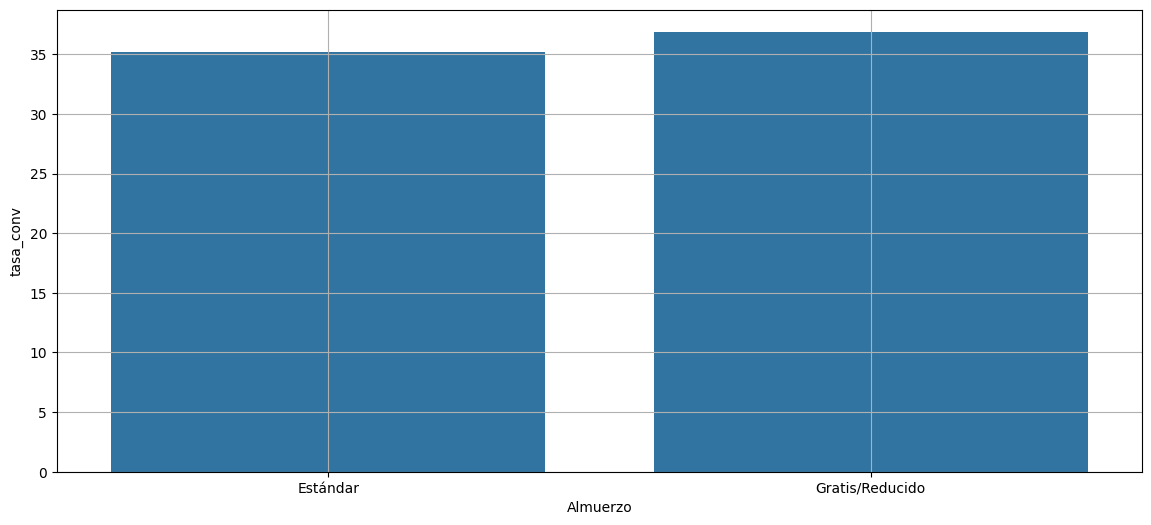

In [52]:
graficar_tasas_conversion('Almuerzo','Preparación_bin')

**Observaciones:**

- Las tasas de conversión son muy similares para los valores de la variable "Almuerzo"

**Resumen**

Las variables predictoras con mayor impacto en la tasa de conversión parecen ser, en orden de importancia:
1. Nota: Casi 70% de conversión para la nota "A"
2. Nivel educativo de los padres: Con tasas de más del 40% y 39% para "Algun estudio de secundaria" y "Licenciatura"
3. Almuerzo: Con niveles de conversión comparables entre "Estándar" y "Gratis/Reducido"

### 3.3 Análisis bivariado

Y podemos ir un paso más allá en este análisis exploratorio y analizar posibles interacciones entre pares de variables predictoras y su impacto en la variable a predecir. Esto se conoce como análisis bivariado.
La forma más sencilla de hacer este análisis es a través de gráficas.

In [53]:
# Tasa de conversión para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
    tc = df.groupby(col_list, observed=False)['Preparación_bin'].mean().to_frame().reset_index()

    # Gráfica
    plt.figure(figsize=(13,7))
    ax = sns.pointplot(x='Preparación_bin', y=col_list[0], hue=col_list[1], data=tc, order=orden, linestyle='none')
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
    plt.xlabel('Tasa de conversión (%)')
    plt.xlim((0,1))

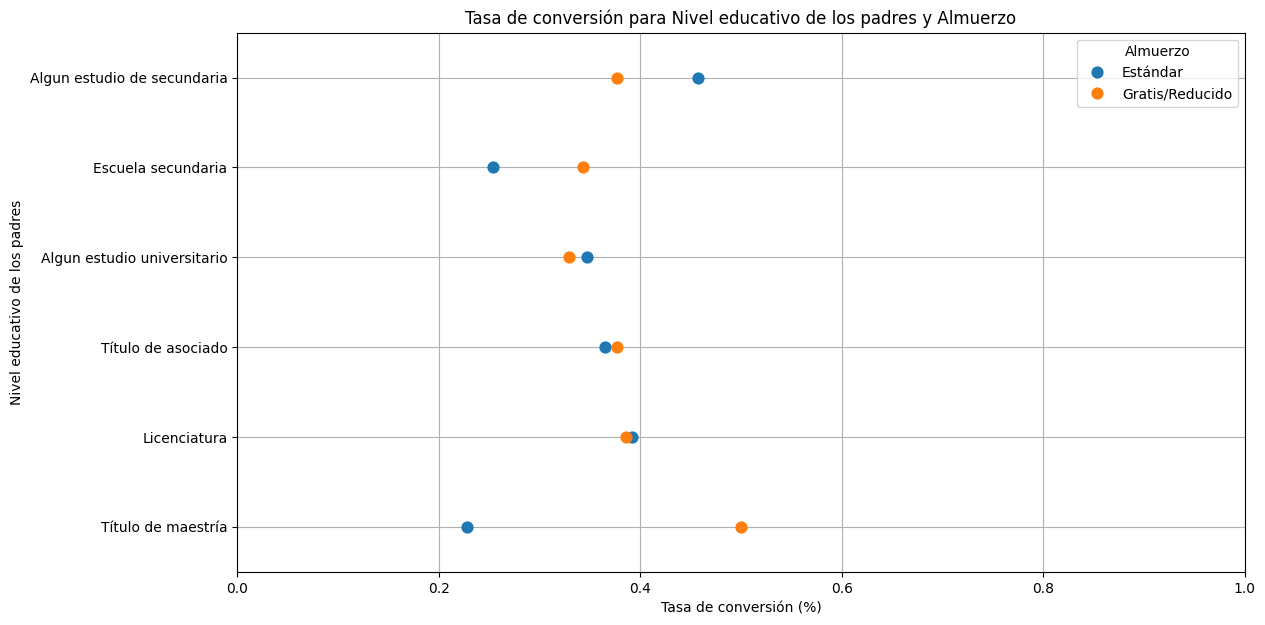

In [54]:
graficar_tc_bivariada(['Nivel educativo de los padres','Almuerzo'])

**Observaciones:**

Tasas de conversión superiores al 30% con Almuerzo == Gratis/Reducido y 
Nivel educativo = Título de maestría (50%), Licenciatura (39%), Título de asociado (37%), Algun estudio de secundaria (37%).

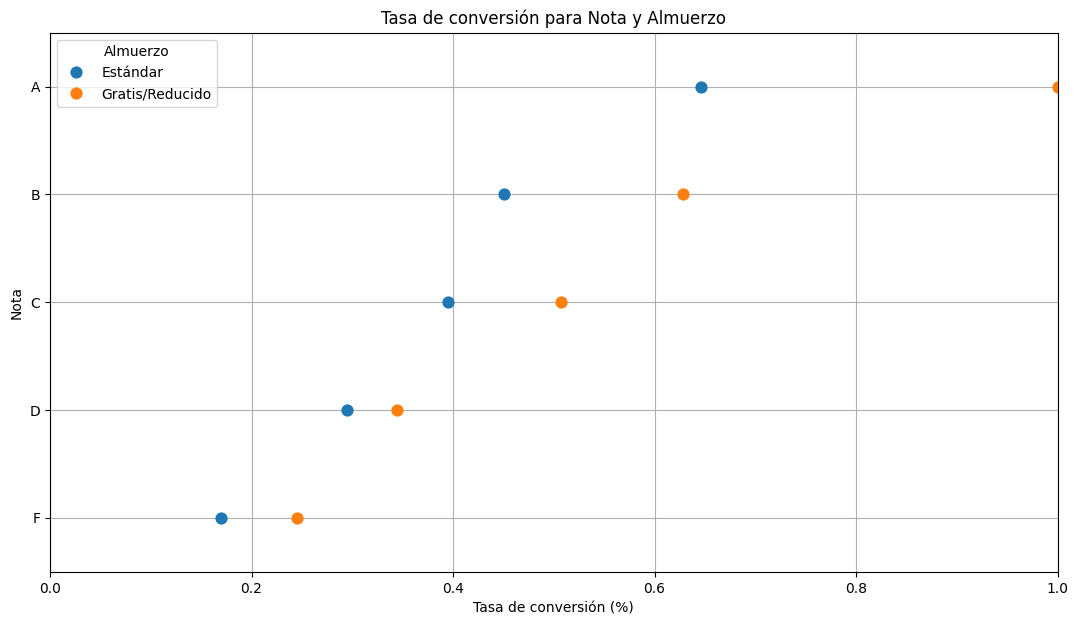

In [55]:
graficar_tc_bivariada(['Nota','Almuerzo'])

**Observaciones:**

Tasas de conversión superiores para Almuerzo == Gratis/Reducido en todos los grupos de notas.

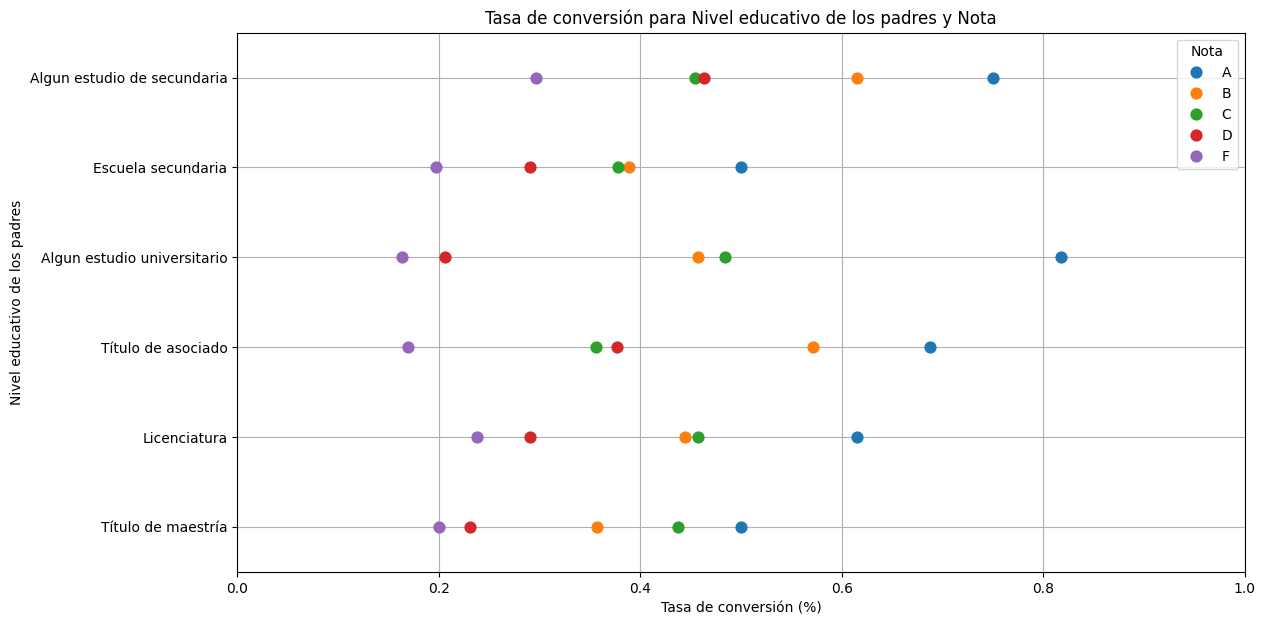

In [56]:
graficar_tc_bivariada(['Nivel educativo de los padres', 'Nota'])

**Observaciones:**

Tasas de conversión superiores al 50% con Nota == A y 
Nivel educativo = Algun estudio universitario (82%), Algun estudio de secundaria (75%), Título de asociado (65%), Licenciatura(62%).